<a href="https://colab.research.google.com/github/hamadbinghanem/masar/blob/main/DVProject_HamadBinGhanem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
#import the needed packages
import seaborn as sn
import pandas as pd

#read the data
df = pd.read_csv('/content/sample_data/LakeCounty_Health_-6821310239639457742.csv')
diabetes_unc = df
df.head()

,OBJECTID,NAME,Obesity,Shape__Area,Shape__Length
0,1,Texas,32.4,7.672329e+12,1.540832e+07
1,2,California,24.2,5.327809e+12,1.451870e+07
2,3,Kentucky,34.6,1.128830e+12,6.346699e+06
3,4,Georgia,30.7,1.652980e+12,5.795596e+06
4,5,Wisconsin,30.7,1.567816e+12,6.806782e+06


In [202]:
from google.colab import drive
drive.mount('/content/drive')
# get the column
df.columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Index(['OBJECTID', 'NAME', 'Obesity', 'Shape__Area', 'Shape__Length'], dtype='object')

In [203]:
#rename columns
df.rename(columns={'OBJECTID':'ID'}, inplace=True)
df.rename(columns={'NAME':'State Name'}, inplace=True)

df.head()

,ID,State Name,Obesity,Shape__Area,Shape__Length
0,1,Texas,32.4,7.672329e+12,1.540832e+07
1,2,California,24.2,5.327809e+12,1.451870e+07
2,3,Kentucky,34.6,1.128830e+12,6.346699e+06
3,4,Georgia,30.7,1.652980e+12,5.795596e+06
4,5,Wisconsin,30.7,1.567816e+12,6.806782e+06


In [204]:
#check the null (missing values)
df.isnull()
d = 'Y'
dd= ' Y'
ddd= '  Y'
d_1 = ''

In [205]:
#check how many missing values
df.isnull().sum()


ID               0
State Name       0
Obesity          0
Shape__Area      1
Shape__Length    1
dtype: int64

In [206]:
#replace the missing value(s) with mean

df['Shape__Area'] = df['Shape__Area'].fillna(df['Shape__Area'].mean())
df['Shape__Length'] = df['Shape__Length'].fillna(df['Shape__Length'].mean())

In [207]:
# dropping the missing values
df_new = df.dropna()
#check how many missing values
df.isnull().sum()

ID               0
State Name       0
Obesity          0
Shape__Area      0
Shape__Length    0
dtype: int64

In [208]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             52 non-null     int64  
 1   State Name     52 non-null     object 
 2   Obesity        52 non-null     float64
 3   Shape__Area    52 non-null     float64
 4   Shape__Length  52 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.2+ KB


In [209]:
#check the class column values
df_new['State Name'].unique()

array(['Texas', 'California', 'Kentucky', 'Georgia', 'Wisconsin',
       'Oregon', 'Virginia', 'Tennessee', 'Louisiana', 'New York',
       'Michigan', 'Idaho', 'Florida', 'Alaska', 'Montana', 'Minnesota',
       'Nebraska', 'Washington', 'Ohio', 'Illinois', 'Missouri', 'Iowa',
       'South Dakota', 'Arkansas', 'Mississippi', 'Colorado',
       'North Carolina', 'Utah', 'Oklahoma', 'Wyoming', 'West Virginia',
       'Indiana', 'Massachusetts', 'Nevada', 'Connecticut',
       'District of Columbia', 'Rhode Island', 'Alabama', 'Puerto Rico',
       'South Carolina', 'Maine', 'Hawaii', 'Arizona', 'New Mexico',
       'Maryland', 'Delaware', 'Pennsylvania', 'Kansas', 'Vermont',
       'New Jersey', 'North Dakota', 'New Hampshire'], dtype=object)

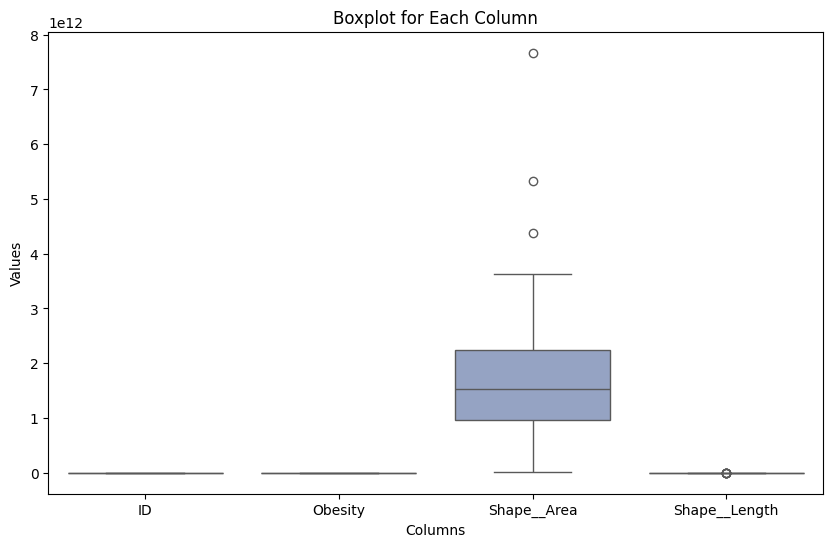

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create boxplots for each column using seaborn
sns.boxplot(data=df_new
            , orient='v', palette='Set2')

# Set plot labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for Each Column')

# Show the plot
plt.show()


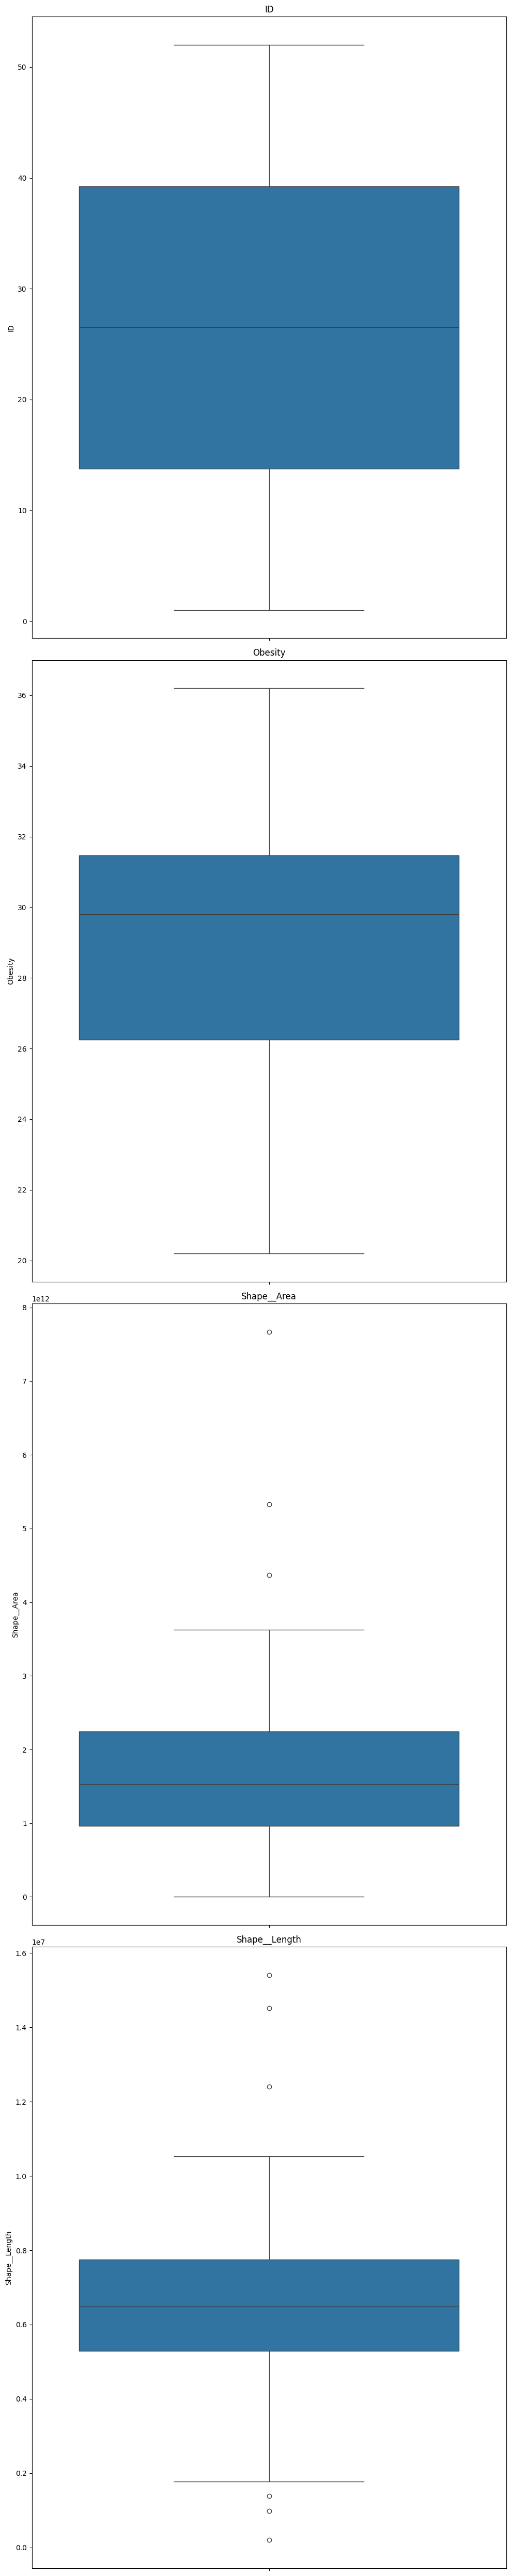

In [211]:
# Select only numeric columns
numeric_columns = df_new.select_dtypes(include='number').columns

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 50))

# Create individual boxplots for each numeric column using seaborn
for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df_new[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [212]:
df_new['Obesity'].max()
#max value

df_new.describe()

,ID,Obesity,Shape__Area,Shape__Length
count,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,26.500000,29.286538,1.757944e+12,6.417699e+06
std,15.154757,3.832832,1.434563e+12,2.936792e+06
min,1.000000,20.200000,1.972102e+09,2.003250e+05
25%,13.750000,26.250000,9.623563e+11,5.286797e+06
50%,26.500000,29.800000,1.531786e+12,6.479099e+06
75%,39.250000,31.475000,2.245753e+12,7.747383e+06
max,52.000000,36.200000,7.672329e+12,1.540832e+07


In [213]:
df_new[df_new.Obesity <25]

,ID,State Name,Obesity,Shape__Area,Shape__Length
1,2,California,24.2,5.327809e+12,1.451870e+07
14,15,Montana,23.6,4.371466e+12,9.745472e+06
25,26,Colorado,20.2,3.066879e+12,7.092296e+06
27,28,Utah,24.5,2.614281e+12,6.798973e+06
32,33,Massachusetts,24.3,2.472250e+11,4.197218e+06
35,36,District of Columbia,22.1,1.972102e+09,2.003250e+05
41,42,Hawaii,22.7,1.757944e+12,6.417699e+06


In [214]:
df_2 = df_new[df_new.Obesity > 25]
df_2

,ID,State Name,Obesity,Shape__Area,Shape__Length
0,1,Texas,32.4,7.672329e+12,1.540832e+07
2,3,Kentucky,34.6,1.128830e+12,6.346699e+06
3,4,Georgia,30.7,1.652980e+12,5.795596e+06
4,5,Wisconsin,30.7,1.567816e+12,6.806782e+06
5,6,Oregon,30.1,3.178446e+12,7.976011e+06
6,7,Virginia,29.2,1.158804e+12,7.710804e+06
7,8,Tennessee,33.8,1.177054e+12,6.350377e+06
8,9,Louisiana,36.2,1.355094e+12,7.383857e+06
10,11,Michigan,31.2,1.657222e+12,1.240799e+07
11,12,Idaho,28.6,2.593598e+12,9.081125e+06


In [215]:
# check for duplicate values
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
dtype: bool

In [216]:
#saving the new dataframe into a csv file

df_2.to_csv('DVProjectHamadBinGhanem.csv')

In [217]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_csv('/content/DVProjectHamadBinGhanem.csv')
df
df.head()

,Unnamed: 0,ID,State Name,Obesity,Shape__Area,Shape__Length
0,0,1,Texas,32.4,7.672329e+12,1.540832e+07
1,2,3,Kentucky,34.6,1.128830e+12,6.346699e+06
2,3,4,Georgia,30.7,1.652980e+12,5.795596e+06
3,4,5,Wisconsin,30.7,1.567816e+12,6.806782e+06
4,5,6,Oregon,30.1,3.178446e+12,7.976011e+06


In [218]:
columns_to_normalize = ['Obesity', 'Shape__Area', 'Shape__Length']

# Normalization using StandardScaler
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df


,Unnamed: 0,ID,State Name,Obesity,Shape__Area,Shape__Length
0,0,1,Texas,0.676881,4.553983,3.403425
1,2,3,Kentucky,1.410612,-0.394362,0.021093
2,3,4,Georgia,0.109908,0.002012,-0.184611
3,4,5,Wisconsin,0.109908,-0.062391,0.192823
4,5,6,Oregon,-0.090200,1.155604,0.629248
5,6,7,Virginia,-0.390363,-0.371695,0.530258
6,7,8,Tennessee,1.143801,-0.357894,0.022466
7,8,9,Louisiana,1.944234,-0.223256,0.408222
8,10,11,Michigan,0.276665,0.005220,2.283524
9,11,12,Idaho,-0.590471,0.713329,1.041742


In [219]:
# Scaling to a specific range [0, 1] using MinMaxScaler
min_max_scaler = MinMaxScaler()
df[columns_to_normalize] = min_max_scaler.fit_transform(df[columns_to_normalize])
df.head()

,Unnamed: 0,ID,State Name,Obesity,Shape__Area,Shape__Length
0,0,1,Texas,0.657658,1.000000,1.000000
1,2,3,Kentucky,0.855856,0.143089,0.371759
2,3,4,Georgia,0.504505,0.211730,0.333551
3,4,5,Wisconsin,0.504505,0.200577,0.403656
4,5,6,Oregon,0.450450,0.411499,0.484719


In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium


# Interactive plot using Plotly
fig = px.scatter(df_new, x='Shape__Area', y = 'Obesity', size='Obesity', color='State Name',
                 hover_name='State Name', log_x=True, size_max=20)
fig.update_layout(title='National Obesity By State',
                  xaxis_title='Obesity',
                  yaxis_title='Shape__Area',
                  coloraxis_colorbar_title='State Name')

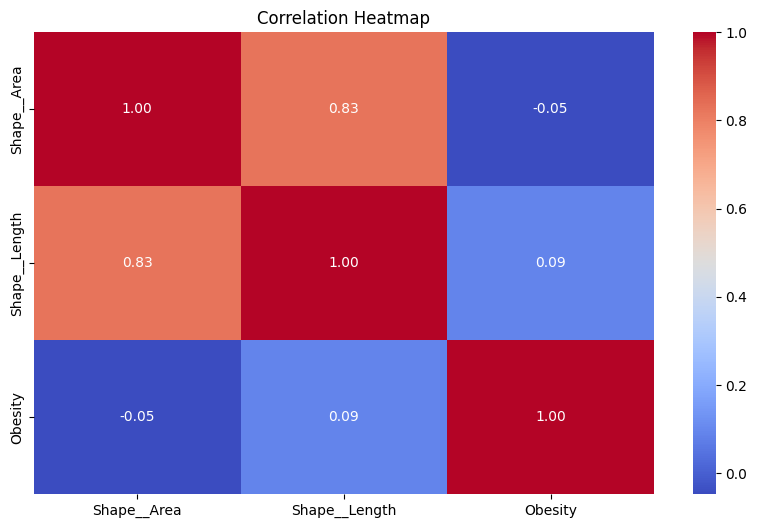

In [221]:
# Heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df_new[['Shape__Area','Shape__Length','Obesity']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: xlabel='Obesity', ylabel='Obesity'>,
        <Axes: xlabel='Shape__Area', ylabel='Obesity'>,
        <Axes: xlabel='Shape__Length', ylabel='Obesity'>],
       [<Axes: xlabel='Obesity', ylabel='Shape__Area'>,
        <Axes: xlabel='Shape__Area', ylabel='Shape__Area'>,
        <Axes: xlabel='Shape__Length', ylabel='Shape__Area'>],
       [<Axes: xlabel='Obesity', ylabel='Shape__Length'>,
        <Axes: xlabel='Shape__Area', ylabel='Shape__Length'>,
        <Axes: xlabel='Shape__Length', ylabel='Shape__Length'>]],
      dtype=object)

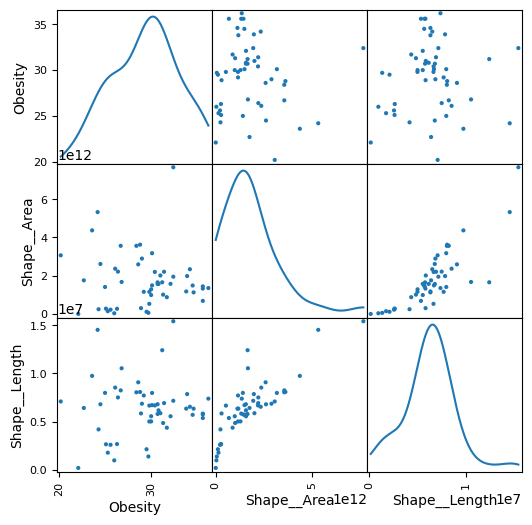

In [222]:
from pandas.plotting import scatter_matrix
df_update = df_new.drop(columns=['ID'])
df_update
scatter_matrix(df_update, alpha = 1, figsize = (6, 6), diagonal = 'kde')